In [21]:
import os
import sys, glob
import argparse
# 異なる階層のutilsをインポートするために必要
sys.path.append("../../")
import numpy as np
import pandas as pd
import math
import re
import random
from collections import defaultdict
# 異なる階層のutilsからインポート
from utils.constant import *
from utils.help_func import load_pickle, save_pickle, load_json, save_json
# 異なる階層のmodel_utilsからインポート
from model_utils.model_util import load_model, sent2tensor
from model_utils import train_args

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_context('paper', 1.5)
import warnings
warnings.simplefilter('ignore')

In [22]:
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'mcc', 'auc']
datasets = ['Tomita3', 'Tomita4', 'Tomita7', 'BP', 'RTMR', 'IMDB', 'TOXIC']

def build_df(variant):
  # SRNN
  dfa_path = get_path(f'data/dfa/{variant}/best_res_{variant}.csv')
  pfa_path = get_path(f'data/dfa/{variant}/pfa_best_res_{variant}.csv')
  dfa_res = np.genfromtxt(dfa_path, delimiter=',', dtype='float')
  pfa_res = np.genfromtxt(pfa_path, delimiter=',', dtype='float')
  df = pd.DataFrame(columns=['dataset', 'automata', *metrics, ])
  # datasetの列を設定
  df['dataset'] = datasets*2
  # automataの列を設定
  df.iloc[0:len(datasets), 1] = 'DFA'
  df.iloc[len(datasets):2*len(datasets), 1] = 'PFA'
  # メトリクスの値を設定
  df.iloc[0:len(datasets), 2:8] = dfa_res
  df.iloc[len(datasets):2*len(datasets), 2:8] = pfa_res
  # メトリクスの列だけ取り出し，メトリクスの平均値を出す
  metrics_series = df.iloc[:, [2,3,4,5,7]]
  df['avg.'] = metrics_series.mean(axis=1)
  df['1-avg.'] = 1 - df['avg.']
  return df

In [26]:
df_srnn = build_df('srnn')
df_gru = build_df('gru')
df_lstm = build_df('lstm')

In [27]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'sans-serif' # font familyの設定
plt.rcParams["font.size"] = 20 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 18 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 18 # 軸だけ変更されます
plt.rcParams["figure.subplot.left"] = 0
plt.rcParams["figure.subplot.bottom"] = 0
plt.rcParams["figure.subplot.right"] =0.95  
plt.rcParams["figure.subplot.top"] = 0.95

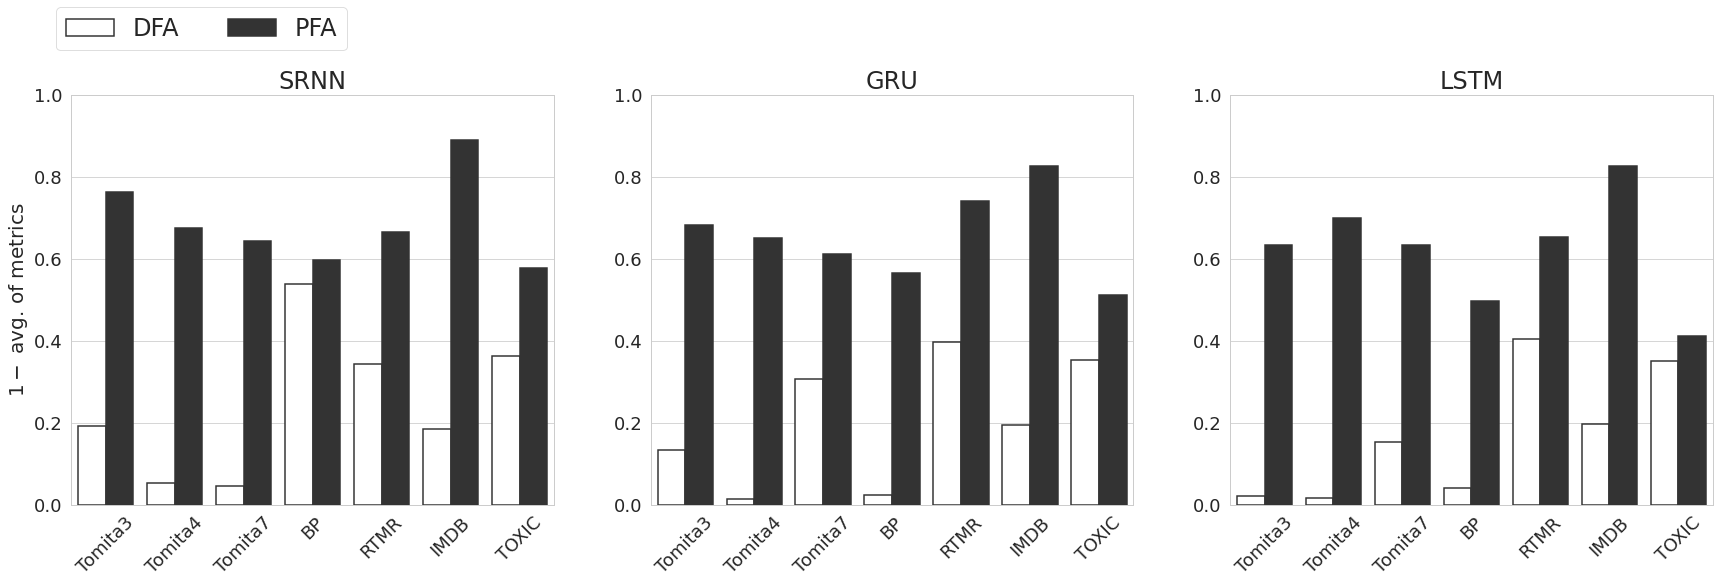

In [28]:
fig = plt.figure(figsize=(24, 6), facecolor="w")
for i, (model_type, df) in enumerate([('SRNN', df_srnn), ('GRU', df_gru), ('LSTM', df_lstm)]):
  ax = fig.add_subplot(1, 3, i+1)
  ax.set_title(model_type, fontsize=24)
  g = sns.barplot(data=df, x='dataset', y='1-avg.', hue='automata', palette=dict(DFA='white', PFA='#333333'), linewidth=1.5, edgecolor='#333333')
  g.legend_.remove()
  ax.set_xlabel(None)
  ax.set_ylabel(None)
  labels = ax.get_xticklabels()
  plt.setp(labels, rotation=45)
  plt.ylim(0, 1)
  if i == 0:
    ax.set_ylabel('$1 -$ avg. of metrics', fontsize=20)
    ax.legend(loc="lower center", bbox_to_anchor=(0.27, 1.05), borderaxespad=1, fontsize=24, ncol=5)
plt.savefig('./Fig12.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()